Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load the dataset

In [2]:
Ad_df=pd.read_csv("C:\\Users\\rupae\\OneDrive\\Desktop\\Advertising.csv")

In [3]:
# Displaying the first few rows of the dataset
Ad_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
unnamed_columns=[col for col in Ad_df.columns if 'Unnamed' in col]
Ad_df = Ad_df.drop(unnamed_columns, axis=1)
Ad_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
Ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
Ad_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
#statistics for dataset
Ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


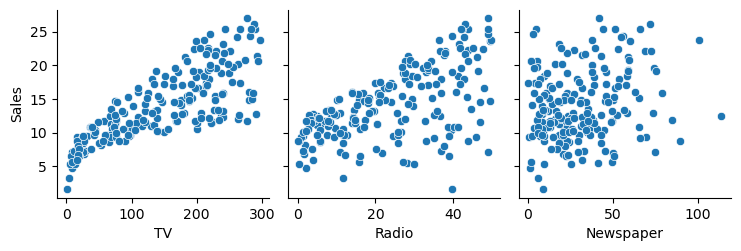

In [8]:
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(Ad_df, x_vars=['TV','Radio','Newspaper'],y_vars='Sales') 
plt.show()

In [9]:
#Separating the independent variables(X) and target variable(y)
X=Ad_df[['TV','Radio','Newspaper']]
Y=Ad_df['Sales']

In [10]:
# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=42)

Training a model

In [12]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
LR_model=LinearRegression()
LR_model.fit(X_train,Y_train )

LinearRegression()

In [13]:
#Prediction
LR_predict=LR_model.predict(X_test)

In [14]:
#Evaluation
MAE=mean_absolute_error(Y_test,LR_predict)
MSE=mean_squared_error(Y_test,LR_predict)
R2_value=r2_score(Y_test,LR_predict)

In [15]:
print('mean_absolute_error:',MAE)
print('mean_squared_error:',MSE)
print('R-squared value:', R2_value)

mean_absolute_error: 1.4607567168117597
mean_squared_error: 3.1740973539761015
R-squared value: 0.8994380241009121


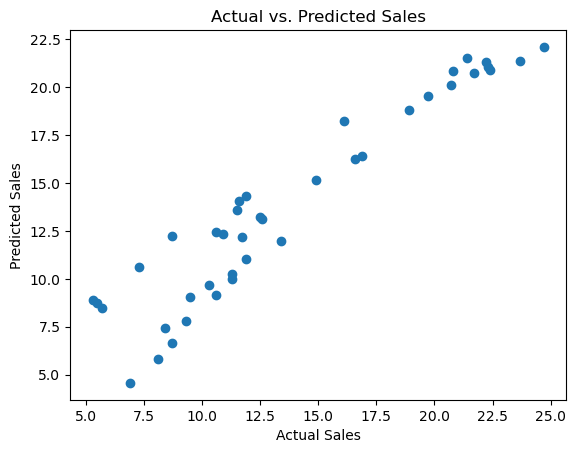

In [16]:
plt.scatter(Y_test,LR_predict)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()